## ANALISIS PREDICTIVO MONEDA DOLAR (USD) 

Elaborado por: Wagner Fernández V.

Introducción

 <p style="text-align: justify;">El caso en las sguientes líneas, trata hacer un análisis, visualización y predicción de un conjunto de datos que contiene el precio del Dolar Estadounidense (USD) frente al Peso Colombiano (COP), en los últimos 30 años; cuyos datos se extraen de la página web del Banco de la República de Colombia - https://www.banrep.gov.co/es/estadisticas/trm</p>

<p style="text-aling:justify;">Se empleará la técnica de Analisis Eploratorio de Datos, (EDA- por sus siglas en inglés) para  analizar e investigar conjuntos de datos y resumir sus características principales, a menudo empleando métodos de visualización de datos. - (IBM, s. f.)</p>

<p style="text-aling:justify;">El algoritmo de Machine Learning que se procede a utilizar en el caso de uso, es el las Redes Neuronales Recurrentes (RNN - por sus siglas en inglés) , utilizando librerías como TensorFlow y Keras.</p>

<p style="text-aling:justify;">Las Redes Neuronales Recurrentes (Neural Recurrent Network) es un tipo de red neuronal artificial que utiliza datos secuenciales o datos de series temporales. Estos algoritmos de deep learning se usan comúnmente para problemas ordinarios o temporales como, por ejemplo, la traducción de idiomas, el procesamiento del lenguaje natural (NLP), el reconocimiento de voz y los subtítulos de imágenes; se incorporan a aplicaciones populares como Siri, búsqueda de voz y Google Translate. - (IBM, s. f.)</p>

Desarrollo

 Conforme a lo anteriormente expuesto, se procede con desarrollar el proyecto de la siguiente manera:

1. Instalación de librerías

Si se está trabajando en un Notebook en la web como por ejemplo Google Colab o Deepnote, se debe instalar esta librería (openpyxl) para poder visualizar un archivo con extensión Microsoft Excel (.xlsx), si se ejecuta en local, solo colocar el simbolo almohadilla (#) antes del pip install.

In [1]:
#!pip install openpyxl

2. Importar las librerías necesarias para el procesamiento, visualización y modelado de los datos

Se procede a instalar las librerías para pre-procesar, procesar y modelar los datos.

In [2]:
import numpy as np # para procesar arreglos y expresiones numéricas.
import pandas as pd # para procesar datos alfanumericos
import seaborn as sns # Para realizar graficos.
import matplotlib.pyplot as plt # Para realizar graficos.
import plotly.graph_objects as go # Para realizar graficos interactivos.
from sklearn.preprocessing import MinMaxScaler # Para gestionar datos escalados
from tensorflow.keras.models import Sequential # Para entrenamiento secuencial
from tensorflow.keras.layers import Dense, LSTM # Para crear capas que se convertiran en redes neuronales y procesar los datos

c:\Users\wagne\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


3. Lectura de los datos 

Se toma el modulo de la librería pandas (pd) para leer el archivo Microsoft Excel, se considera una librería muy potente para hacer la técnica de limpieza de datos (DataCleasing)

In [3]:
dolar = pd.read_excel('C:/Users/wagne/Downloads/ANALISIS-PREDICTIVO-USD/data/dolar2.xlsx') # se tiene encuenta la lectura del df en la ruta donde está almacenado


Lectura del DataFrame

In [4]:
dolar # o tambien se puede hacer ejecutando el siguiente comando: 
#print(dolar)

,fecha,valor
0,1991-11-27,693.32
1,1991-11-28,693.99
2,1991-11-29,694.70
3,1991-11-30,694.70
4,1991-12-01,643.42
...,...,...
11509,2023-06-01,4434.09
11510,2023-06-02,4410.49
11511,2023-06-03,4355.80
11512,2023-06-04,4355.80


Limpieza del Dataframe eliminando columna sobrante a través del método .drop() si es necesario.

In [5]:
#dolar.drop(['Unnamed: 0'], axis=1, inplace=True)

Lectura de datos despues de limpiados

In [6]:
dolar # solo se pone el nombre del datraframe para que pueda ser leído

,fecha,valor
0,1991-11-27,693.32
1,1991-11-28,693.99
2,1991-11-29,694.70
3,1991-11-30,694.70
4,1991-12-01,643.42
...,...,...
11509,2023-06-01,4434.09
11510,2023-06-02,4410.49
11511,2023-06-03,4355.80
11512,2023-06-04,4355.80


Resumen estadístico del DataFrame pre-procesado en lo que respecta al de valores

In [7]:
dolar.describe()# Aplicación del método describe, para que muestre las medidas estadísticas del DataFrame

,valor
count,11514.000000
mean,2220.043473
std,944.621755
min,620.620000
25%,1763.550000
50%,2169.310000
75%,2868.575000
max,5061.210000


Resumen estadístico del DataFrame en lo que respecta al rango de fechas

In [8]:
dolar['fecha'].describe() # se puede tomar como el número de días que se está analizando

C:\Users\wagne\AppData\Local\Temp\ipykernel_10088\308462631.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dolar['fecha'].describe() # se puede tomar como el número de días que se está analizando


count                   11514
unique                  11514
top       1991-11-27 00:00:00
freq                        1
first     1991-11-27 00:00:00
last      2023-06-05 00:00:00
Name: fecha, dtype: object

Nota: teniendo en cuenta el comando anterior, en la etiqueta "count" muestra un conteo de días calendario, almacenados en el DataFrame.

Conteo de Indices o filas con datos en el DataFrame

In [9]:
dolar.count()# se puede tomar como el número de días que se está analizando

fecha    11514
valor    11514
dtype: int64

4. Visualización de los datos

In [10]:
prices = dolar['valor'].values.reshape(-1, 1)
# Convertir la columna 'fecha' al formato de fecha
dolar['fecha'] = pd.to_datetime(dolar['fecha'])

# Crear el gráfico de línea con Plotly
fig = go.Figure(data=go.Scatter(x=dolar['fecha'], y=dolar['valor'], mode='lines'))

# Personalizar los marcadores
fig.update_traces(marker=dict(size=9, symbol='circle', color='green'))


# Personalizar el diseño del gráfico
fig.update_layout(
    title={'text':"Análisis USD vs COP en las ultimas 3 décadas",'x':0.5,'xanchor':'center'},
    xaxis_title="Fecha cronológica - (dd/mm/aa)",
    yaxis_title="Valor en Pesos Colombianos - (COP)"
)

# Mostrar el gráfico
fig.show()

5. Predicción de valores

Consiste en las instrucciones consistentes que se le va dar a la red nueronal para que procese los datos de entrada y muestre unos resultados de salida. 

In [11]:
# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1)) # Se procede con crear una instancia de la clase MinMaxScaler y se asigna a la variable scaler. Esta clase se utiliza para realizar la normalización de características en un rango específico. En este caso, se establece el rango de características en valores entre 0 y 1.
scaled_prices = scaler.fit_transform(prices) # Se procede con aplicar la transformación de escala a la variable prices utilizando el método fit_transform() del objeto scaler. Este método calcula los valores mínimo y máximo de la variable prices y luego realiza la transformación de escala. La variable resultante scaled_prices contiene los precios escalados.

# Dividir los datos en conjunto de entrenamiento y prueba.
train_size = int(len(scaled_prices) * 0.8) # Se procede con calcular el tamaño del conjunto de entrenamiento como el 80% del tamaño total de los datos escalados. La función len() devuelve la longitud de la lista scaled_prices, y luego se multiplica por 0.8 y se convierte en un entero utilizando int().
train_data = scaled_prices[:train_size]# Se procede con asignar una variable train_data los primeros train_size elementos de la lista scaled_prices. Esto significa que train_data contendrá los datos de entrenamiento, que corresponden al 80% inicial de los datos escalados.
test_data = scaled_prices[train_size:] # Se procede con asignar variable test_data los elementos de scaled_prices a partir del índice train_size hasta el final de la lista. Esto significa que test_data contendrá los datos de prueba, que corresponden al 20% restante de los datos escalados.

6. Preparar los datos de entrenamiento

Se preparan los datos pre-procesados, listos para que la red neuronal aprenda, entrene y pruebe los mismos.

In [12]:
# Preparar los datos de entrenamiento
def create_sequences(data, sequence_length): #se define una variable, para que elabore el paso de secuencia con los datos de entrenamiento
    X, y = [], [] # Se procede con crear dos listas vacías, X e y, para almacenar las secuencias de datos de entrada y las secuencias objetivo respectivamente.
    for i in range(len(data) - sequence_length): # En esta línea, se inicia un bucle for que se ejecutará desde 0 hasta el número de elementos en data menos la longitud de la secuencia (sequence_length). 
        X.append(data[i:i+sequence_length]) # Para este caso, se extrae una secuencia de longitud sequence_length de la lista data, comenzando en el índice i, y la agrega a la lista X. Cada secuencia extraída se agrega como un elemento independiente a la lista X. En el contexto de una red neuronal recurrente, estas secuencias serían los datos de entrada que se alimentarán a la red en pasos de tiempo sucesivos.
        y.append(data[i+sequence_length]) # Se procede con agregar el siguiente elemento después de la secuencia extraída a la lista y. En el contexto de una red neuronal recurrente, estos elementos serían los valores objetivo correspondientes a cada secuencia de entrada en X. Estos valores objetivo se utilizan para comparar las predicciones de la red con los valores reales durante el entrenamiento.
    return np.array(X), np.array(y) # En este caso, se convierte las listas X e y en arreglos de NumPy utilizando np.array(). Luego, devuelve estos arreglos como salida de la función. En el contexto de una red neuronal recurrente, estos arreglos se utilizan como datos de entrada y datos objetivo para entrenar el modelo.

sequence_length = 10 # numero de pruebas que realizará secuencialmente el algoritmo, para que entrene con los datos que se le proporcionan
X_train, y_train = create_sequences(train_data, sequence_length)# procedimiento para que el algoritmo se prepare con los datos de entrenamiento
X_test, y_test = create_sequences(test_data, sequence_length) # procedimiento para que el algoritmo se prepare con los datos de prueba

7. Modelar los datos con el algoritmo de Deep Learning o aprendeizaje profundo

Crear el modelo de la Red Neuronal Artificial

* Entrenar el modelo

Esto consiste en que los datos pre-procesados o procesados sean tomados por cada una de las capas de entrada que conforman la red neuronal,con el fin de  que las respuestas de la capa de salida se ajusten lo más posible a los datos que conocemos.

* Evaluar el modelo

Esto quiere decir, que se evaluará el modelo en terminos de porcentaje, con el fin de saber si está trabajando adecuadamente con el conjunto de datos que se le asignan para su análisis. 

* Hacer predicciones

En este punto, se procederán hacer las predicciones, tomando los datos de entrenamiento y prueba del conjunto de datos que se le pone al modelo.

* Desnormalizar los datos

En este caso, se le da la instrucción a l modelo de Machine Learning para que deje de entrenar con los datos de entrenamiento y prueba que se fueron extraídos; esto quiere decir que los datos quedan desnormalizados.

In [13]:
# Crear el modelo de la RNN
model = Sequential() # tipo de modelo a tomar basandose en la librería de Kerasd
model.add(LSTM(64, input_shape=(sequence_length, 1))) # Long short-term memory o memoria a corto plazo, con 64 unidades de neuronas para se retroalimente la RNN
model.add(Dense(1)) # Se agrega capa densa  densa a la res con una sola unidad de salida
model.compile(optimizer='adam', loss='mean_squared_error') # Se especifica el optimizador 'adam', que es un algoritmo popular para optimización de redes neuronales y el loss que permite minimizar el error cuadrático medio entre las predicciones y los valores reales

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=16)# Se entrena el modelo utilizando los datos de entrenamiento X_train y y_train. Se especifica un número de épocas (10) y un tamaño de lote (16). Durante el entrenamiento

# Evaluar el modelo
train_loss = model.evaluate(X_train, y_train) # En esta linea de codigo, para evaluar los datos de entrenamiento
test_loss = model.evaluate(X_test, y_test) # En esta linea de codigo, se utiliza para entrenar los datos de prueba
print(f'Error de entrenamiento: {train_loss}') # impresión de resultados en los datos de entrenamiento
print(f'Error de prueba: {test_loss}') # impresión de resultados en los datos de prueba

# Hacer predicciones
train_predictions = model.predict(X_train) # predicción en los datos de entrenamiento
test_predictions = model.predict(X_test) # prediccion en los datos de prueba

# Desnormalizar los datos
train_predictions = scaler.inverse_transform(train_predictions) # modulo que se utiliza para normalizar los datos de entrenamiento
y_train = scaler.inverse_transform(y_train) #  Se deshace la normalización de los valores de entrenamiento
test_predictions = scaler.inverse_transform(test_predictions) # modulo que se utiliza para normalizar los datos de prueba
y_test = scaler.inverse_transform(y_test) #  Se deshace la normalización de los valores de PRUEBA

Epoch 1/10
576/576 [==============================] - 12s 10ms/step - loss: 0.0014
Epoch 2/10
576/576 [==============================] - 6s 10ms/step - loss: 3.7001e-05
Epoch 3/10
576/576 [==============================] - 6s 10ms/step - loss: 3.5519e-05
Epoch 4/10
576/576 [==============================] - 7s 12ms/step - loss: 3.7393e-05
Epoch 5/10
576/576 [==============================] - 8s 15ms/step - loss: 3.6262e-05
Epoch 6/10
576/576 [==============================] - 8s 14ms/step - loss: 3.4148e-05
Epoch 7/10
576/576 [==============================] - 7s 12ms/step - loss: 3.3302e-05
Epoch 8/10
576/576 [==============================] - 6s 11ms/step - loss: 2.8357e-05
Epoch 9/10
576/576 [==============================] - 9s 16ms/step - loss: 2.8389e-05
Epoch 10/10
72/72 [==============================] - 1s 8ms/step - loss: 1.9690e-04
Error de entrenamiento: 6.935440615052357e-05
Error de prueba: 0.00019690056797116995
72/72 [==============================] - 1s 8ms/step


Nota: Las épocas o del inglés "Epoch" son las veces por la cual el algoritmo de ML toma los datos aprende de estos, para de esta forma ver el nivel de exactitud (ACCURACY) que tiene para arrojar los resultados a predecir; Lo importante para que esto tenga exito es preprocesando los datos.

Porcentaje de evaluacion y precisión con datos de entrenamiento

In [14]:
total_prediccion=100 # Aquí eneste punto, lo que se hace es evaluar el modelo de ML para que entrene hasta el 100% los datos de entrenamiento.
error= (train_predictions) # Margen de error que debe arrojar al momento de entrenar el modelo con los datos que se le entregaron- 
porcentaje=(total_prediccion-train_loss) # El porcentaje que deberá arrojar la red neuronal al momento de terminar la actividad o procedimiento.
print(porcentaje,'%') # función para que imprima el porcentaje de precisión del modelo ML en el caso de entrenamiento

99.99993064559385 %


Porcentaje de evaluacion y precisión con datos de prueba

In [15]:
total_prediccion=100 # Aquí eneste punto, lo que se hace es evaluar el modelo de ML para que entrene hasta el 100% los datos de prueba.
error= (test_predictions) # Margen de error que debe arrojar al momento de entrenar el modelo con los datos que se le entregaron- 
porcentaje=(total_prediccion-test_loss) # El porcentaje que deberá arrojar la red neuronal al momento de terminar la actividad o procedimiento.
print(porcentaje,'%') # función para que imprima el porcentaje de precisión del modelo ML en el caso de prueba

99.99980309943203 %


8. Visualizar las predicciones con la librería de visualización Matplotlib (valores de entrenamiento y prueba)

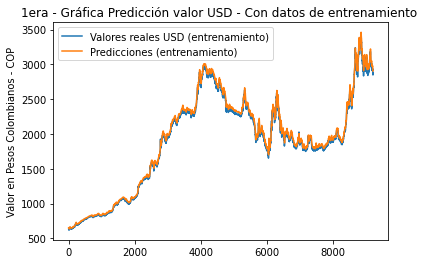

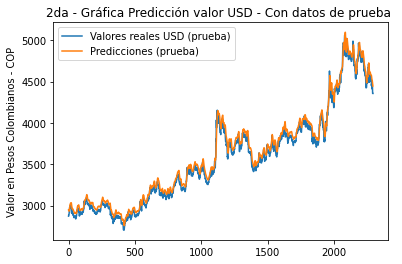

In [16]:
# Visualizar las predicciones - entrenamiento

plt.plot(y_train, label='Valores reales USD (entrenamiento)')
plt.plot(train_predictions, label='Predicciones (entrenamiento)')
plt.title('1era - Gráfica Predicción valor USD - Con datos de entrenamiento ')
plt.ylabel('Valor en Pesos Colombianos - COP')
plt.legend()
plt.savefig('C:/Users/wagne/Downloads/ANALISIS-PREDICTIVO-USD/reports/1.jpg')
plt.show()

# Visualizar las predicciones - prueba

plt.plot(y_test, label='Valores reales USD (prueba)')
plt.plot(test_predictions, label='Predicciones (prueba)')
plt.title('2da - Gráfica Predicción valor USD - Con datos de prueba ')
plt.ylabel('Valor en Pesos Colombianos - COP')
plt.legend()
plt.savefig('C:/Users/wagne/Downloads/ANALISIS-PREDICTIVO-USD/reports/2.jpg')
plt.show()

Nota: 

Valor maximo a predecir de la moneda actual  COP frente al USD

In [17]:
print("El valor maximo a predecir de la moneda Dolar (USD) a Pesos colombianos (COP) es de:",test_predictions) # impresión de los valores hará predice el modelo ML

El valor maximo a predecir de la moneda Dolar (USD) a Pesos colombianos (COP) es de: [[2945.656 ]
 [2940.083 ]
 [2936.9958]
 ...
 [4484.092 ]
 [4463.5737]
 [4445.2593]]


Conclusiones del proyecto

- El dolar (USD) se ha valorizado a lo largo de estás tres décadas, suscitando una depreciación de la moneda peso (COP), generando una inflación de precios en los bienes y servicios en Colombia. 

- Desde el aspecto técnico, se debe hacer un buen pre-procesamiento de los datos, para que la red neuronal no incurra en el subajuste o sobreajuste cuando haga el ejercicio de entrenamiento con los datos que se le dan al mencionado.

* Viendo el entrenamiento y evaluación del modelo, así como el pre-procesamiento de los datos, la RNN muestra un 99,9% de accuracy o precisión, por lo que no hay evidencia de subajuste o sobreajuste, ya que con los datos de entrenamiento como en los de prueba, tiene los mismos porcentajes al momento de trabajar con los mencionados datos. Según (Amazon, sf) e (IBM, sf )el subajuste es cuando el modelo no puede generalizar datos nuevos y el sobrejuste es cuando moldea los datos de entrenamiento demasiado bien; otros casos los datos de entrenamiento todo marcha bien, pero con los datos de prueba muestra incluso un comportamiento de subajuste; es de anotar que tanto los datos de entrenamiento, como los datos de prueba deben trabajar muy bien; por lo que en las dos gráficas no se muestra esa anoramalidad.

* Financieramente, es de mucha importancia aplicar la técnica del pensamiento crítico, para inferir o determinar si es viable o no hacer inversión; tanto en compra como en venta de la divisa.

Referencias Bibliográficas

¿Qué es el sobreajuste? - Explicación del sobreajuste en machine learning - AWS. (s. f.). Amazon Web Services, Inc. https://aws.amazon.com/es/what-is/overfitting/

¿Qué es el subajuste? | IBM. (s. f.). https://www.ibm.com/mx-es/topics/underfitting#:~:text=el%20siguiente%20paso-,%C2%BFQu%C3%A9%20es%20el%20Subajuste%3F,en%20los%20datos%20no%20vistos.

Bar. (s. f.). https://plotly.com/python/bar-charts/

Comunidad Huawei Enterprise. (s. f.). ¿Qué es Epoch en Machine Learning? - Comunidad Huawei Enterprise. https://forum.huawei.com/enterprise/es/%C2%BFqu%C3%A9-es-epoch-en-machine-learning/thread/1009781-100757

Dabbas, E. (2021). Interactive Dashboards and Data Apps with Plotly and Dash: Harness the Power of a Fully Fledged Frontend Web Framework in Python - No JavaScript Required.

Géron, A. (2019). Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O’Reilly.

IBM. (s. f.). ¿Qué son las redes neuronales recurrentes? https://www.ibm.com/es-es/topics/recurrent-neural-networks

IBM. (s. f.). ¿Qué es el análisis exploratorio de datos? |  https://www.ibm.com/mx-es/topics/exploratory-data-analysis 

McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, Numpy, and Ipython. O’Reilly Media.

Roldán, R. C., Martín, E. M., & Rodríguez, A. R. (2019). Big data con Python: recolección, almacenamiento y proceso.

Vanderplas, J. T., & VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. O’Reilly Media.

Wilke, C. O. (2019). Fundamentals of Data Visualization: A Primer on Making Informative and Compelling Figures.